In [20]:
"""
In this part of the exercise, you will implement a neural network to recognize handwritten digits using the same 
training set as before. The neural network will be able to represent complex models that form non-linear hypotheses. 
For this week, you will be using parameters from a neural network that we have already trained. Your goal is to 
implement the feedforward propagation algorithm to use our weights for prediction.
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.io import loadmat
from scipy.special import expit as sigmoid

Our neural network is as shown below


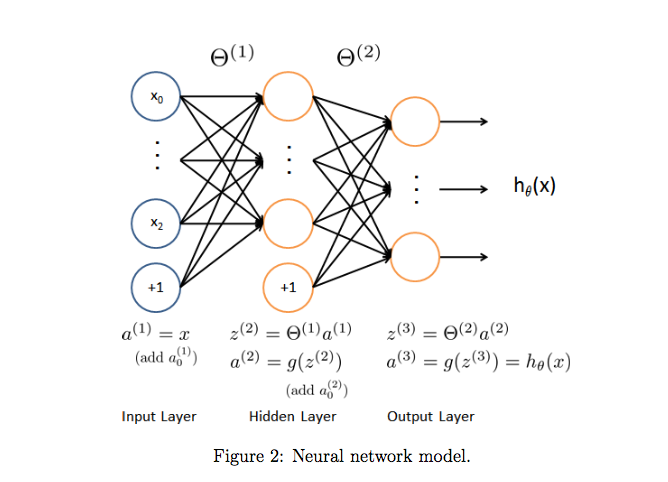

In [21]:
print("Our neural network is as shown below")
from IPython.display import Image
Image(filename='nn.jpg')

Visualizing data


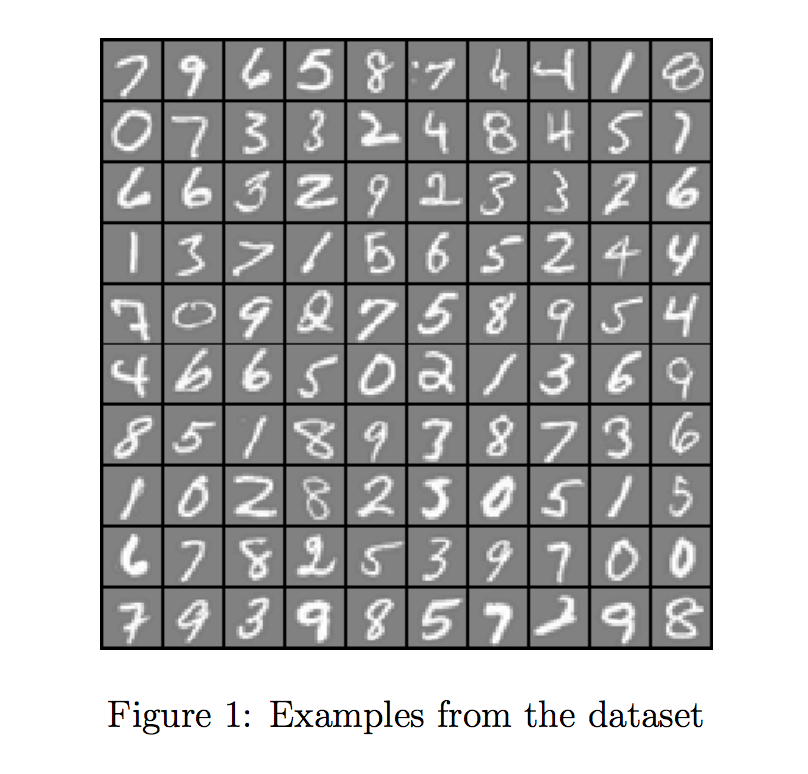

In [22]:
"""
Our neural network is shown in Figure 2. It has 3 layers – an input layer, a hidden layer and an output layer. 
Recall that our inputs are pixel values of digit images. Since the images are of size 20×20, this gives us 400 
input layer units (excluding the extra bias unit which always outputs +1). As before, the training data will be 
loaded into the variables X and y.

"""
print("Visualizing data")
from IPython.display import Image
Image(filename='data.jpg')

In [23]:
#iniialize variables
data = loadmat('ex3data1.mat')

X=data['X']
y=data['y']
m=X.shape[0]#initializing number of training examples
n=X.shape[1]#initializing number of features/input

Y=np.zeros((m,10))#initialzing y matrix
max=np.amax(y)

hidden_size = 25#number of nodes in the hidden layer



In [26]:
"""
We initialize the weights that our model learns first as matrices of random variables which are then updated by \
backpropagation.
generally the dimensions for each weight vector is: (size of current layer+1,size of next layer)
"""

theta1 = 0.25*(np.random.random((n + 1, hidden_size))-0.5)
theta2 = 0.25*(np.random.random((hidden_size + 1, Y.shape[1]))-0.5)

"""
Re-initializing y matrix as a mx10 matrix 
"""
for i in range(max):
    var=y[i]
    Y[i,var-1]=1


In [28]:

"""
the sigmoid function is used as an activation fucntion to convert linear outputs to non linear outputs such that 
probability is outputed in between 0 and 1. we use the scipy.special function from scipy to compute the sigmoid
"""

def sigmoid_grad(z):
    """
    The derivative of the sigmoid function is computed
    """
    s=sigmoid(z)
    return s*(1-s)

def forward_propagate(X,theta1,theta2):
    """
        This function propagates through the network computing the output of
        every layer of the neural network with the given inputs and weights and
        computes the final output of the xor gate
        
    """
    #first, a column of biases is added to the input of the first layer
    a1=np.c_[np.ones(X.shape[0]),X]#mxn+1
    #the weights of the first layer are multiplied by the input of the first layer
    z1=a1.dot(theta1)#mxhidden
    #the input of the second layer is the output of the first layer, passed through the activation function and column of biases is added
    a2=np.c_[np.ones(X.shape[0]),sigmoid(z1)]#mxhidden+1
    #the input of the second layer is multiplied by the weights
    z3=a2.dot(theta2)
    #the output is passed through the activation function to obtain the final probability
    h3=sigmoid(z3)
    #print(h3.shape)
    return a1,z1,a2,z3,h3

def cost(X,Y,t1,t2):
    a1,z1,a2,z3,hyp=forward_propagate(X,t1,t2)
    one=np.ones(Y.shape)#initialzing a matrix of ones for matrix subtraction
    J=(-1/m)*np.sum(np.multiply(Y,np.log(hyp))+np.multiply((one-Y),np.log(one-hyp)))
    return J

In [ ]:
 """
    Performing backpropagation
    For every iteration, we are calculating the error of each layer and updating the weights
    appropriately so as to minimize this error.
    
"""
for i in range(100000):
    a1, z1, a2, z3, hyp = forward_propagate(X, theta1, theta2)# for every iteration, forward propagation is carried out
    del_2= Y-hyp#the error of the final layer is calculated- the difference between the predicted and actual output
    delta2=del_2
    #the error of the previous layer is found by computing the dot product of the error of the previous layer and the weights of the second layer,without the column for biases.
    del_1=del_2.dot(theta2[1:,:].T)
    #this matrix is made to undergo element-wise multiplication with the output of the first layer(taking into account the activation function)
    delta1=del_1*sigmoid_grad(z1)

    #the parameters are updated using gradient descent where the learning rate is 0.01 where each error matrix undergoes matrix multiplication with the input of the corresponding layer
    theta2+=(-0.01)*a2.T.dot(delta2)
    theta1+=(-0.01)*a1.T.dot(delta1)

#forward propagating using the new weights
a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)